# Лабароторная работа 4

# Правильный многоугольник Рело. Векторизация вычислений в numpy

Федоренко Алексей Жанович, 21.03.2025

## Задание 4.1. Построение треугольника Рело

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

In [ ]:
n=3 #vertices
center=np.array([0,0])
N=100 # amount of points for 1 side
r=10. #width of relo triangle

### Этап 1. Вычисление координат вершин правильного треугольника

In [3]:
l=r
R=l/(2*np.sin(np.pi/n)) #radius (big one)

In [4]:
t=np.arange(0,2*np.pi,2*np.pi/n)
vertices=center+R*np.transpose([np.cos(t),np.sin(t)])
vertices

array([[ 5.77350269,  0.        ],
       [-2.88675135,  5.        ],
       [-2.88675135, -5.        ]])

In [5]:
vertices[0,0], vertices[0,:], vertices[:,1]

(5.773502691896258, array([5.77350269, 0.        ]), array([ 0.,  5., -5.]))

(-3.3197640478403514, 6.206515393788478, -5.499999999999999, 5.500000000000001)

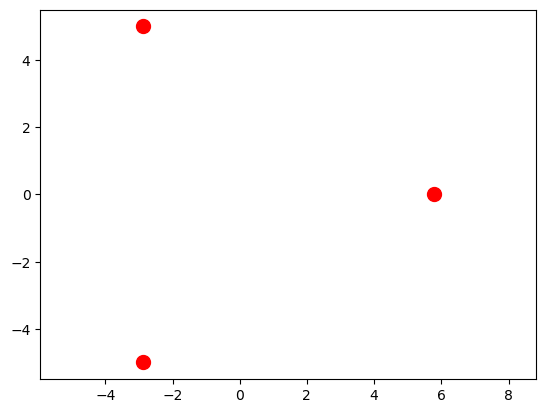

In [6]:
plt.plot(vertices[:,0], vertices[:,1],'r.',markersize=20)
plt.axis('equal')

### Этап 2. Представление одной стороны треугольника Рело

In [7]:
alpha=2*np.pi/n 
beta=alpha/2

In [8]:
angle= np.linspace(-beta/2,beta/2,N)
side0=vertices[0]+r*np.transpose([np.cos(angle+np.pi),np.sin(angle+np.pi)])

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

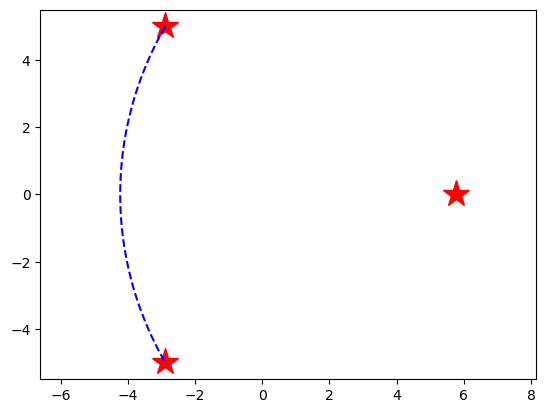

In [9]:
plt.plot(vertices[:,0],vertices[:,1],'r*',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b--',markersize=20)
plt.axis('equal')

In [10]:
side1=vertices[1]+r*np.transpose([np.cos(angle+np.pi+alpha),np.sin(angle+np.pi+alpha)])

(-4.726350454318064, 6.273495698858845, -5.499999999999999, 5.500000000000001)

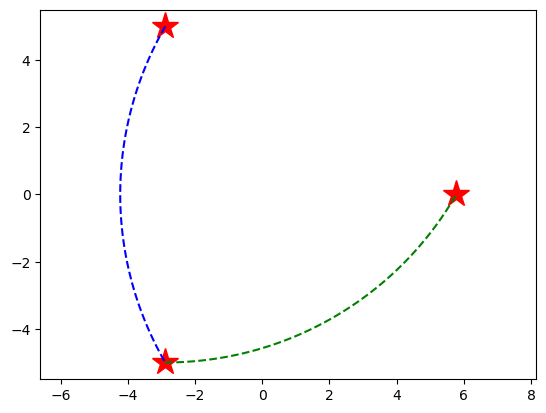

In [11]:
plt.plot(vertices[:,0],vertices[:,1],'r*',markersize=20)
plt.plot(side0[:,0],side0[:,1],'b--',markersize=20)
plt.plot(side1[:,0],side1[:,1],'g--',markersize=20)
plt.axis('equal')

### Этап 3. Моделирование границы треугольника Рело

In [12]:
list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha),
                                             np.sin(angle + np.pi + i*alpha)]) for i in range(n)]


In [13]:
sides = np.concatenate(list_sides)

(-4.726350454318064, 6.273495698858846, -5.499999999999999, 5.500000000000001)

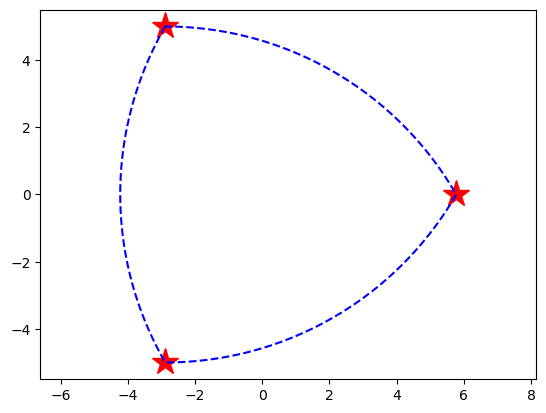

In [14]:
plt.plot(vertices[:,0],vertices[:,1],'r*',markersize=20)
plt.plot(sides[:,0],sides[:,1],'b--',markersize=20)
plt.axis('equal')

## Задание 4.2. Построение правильного многоугольника Рело

$\color{red}\text{Создайте}$ матричное описание границы правильного многоугольника Рело для
произвольных значений переменных `n` , `center` , `r` , `N` , следуя аналогичным
рассуждениям из Задания 4.1 (вычисление координат вершин, представление одной
стороны, моделирование всей границы). Помните, что количество вершин
многоугольника должно быть нечетным.

*Обратите внимание, что длина стороны правильного многоугольника, на основании которого строится многоугольник Рело, является неизвестной величиной и должна быть выражена через количество вершин и ширину многоугольника Рело*

In [15]:
def relo_func(n=3,center=[0,0],r=1,N=100):
 if n%2==0:
        raise ValueError
 else:
        center=np.array(center)
        alpha=2*np.pi/n 
        beta=alpha/2
        angle= np.linspace(-beta/2,beta/2,N)
        
        l=r*np.sqrt(2*(1-np.cos(beta)))   # find l - lenghth of right rectangle side (base of relo rectangle)
        R=l/(2*np.sin(np.pi/n))   # radius of circle for relo rectangle 

        t=np.arange(0,2*np.pi,2*np.pi/n)   
        vertices=center+R*np.transpose([np.cos(t),np.sin(t)])  # vertices of relo rectangle

        # lists of sides
        list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
        sides = np.concatenate(list_sides) # concatenating sides 
 return sides

In [16]:
relo_func()

array([[-2.88675135e-01,  5.00000000e-01],
       [-2.93915464e-01,  4.90811596e-01],
       [-2.99058309e-01,  4.81568276e-01],
       [-3.04103094e-01,  4.72271075e-01],
       [-3.09049256e-01,  4.62921032e-01],
       [-3.13896240e-01,  4.53519194e-01],
       [-3.18643505e-01,  4.44066613e-01],
       [-3.23290519e-01,  4.34564346e-01],
       [-3.27836762e-01,  4.25013456e-01],
       [-3.32281726e-01,  4.15415013e-01],
       [-3.36624913e-01,  4.05770090e-01],
       [-3.40865838e-01,  3.96079766e-01],
       [-3.45004025e-01,  3.86345126e-01],
       [-3.49039012e-01,  3.76567258e-01],
       [-3.52970347e-01,  3.66747257e-01],
       [-3.56797591e-01,  3.56886222e-01],
       [-3.60520315e-01,  3.46985255e-01],
       [-3.64138103e-01,  3.37045465e-01],
       [-3.67650550e-01,  3.27067963e-01],
       [-3.71057262e-01,  3.17053867e-01],
       [-3.74357859e-01,  3.07004296e-01],
       [-3.77551972e-01,  2.96920375e-01],
       [-3.80639243e-01,  2.86803233e-01],
       [-3.

$\color{red}\text{Напишите}$ подробно, как получена аналитическая зависимость $l$ от $n$ и $r$.

In [17]:
l=r*np.sqrt(2*(1-np.cos(beta)))

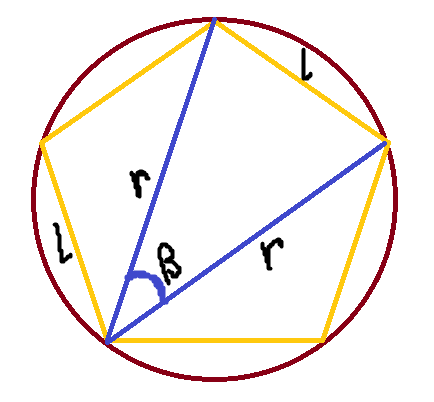

Построим прозвольный многоугольник с нечетным количеством сторон $n$ длины $l$ и проведем из одной вершины две диагонали к вершинам противоположной стороны.\
Эти диагонали будут иметь длину $r$ (ширина многоугольника Рело). Рассмотрим треугольник образованный диагоналями и противоположной стороной.\
Зная, что центральный угол $\alpha=\frac{360\degree}{n}$, найдем угол $\beta=\frac{\alpha}{2}=\frac{180\degree}{n}$. \
Воспользовавшись теоремой косинусов получим следущее: $$l^2=r^2+r^2-2r^2 \cos\beta$$Выражая $l$ получаем:$$l=r\sqrt{2(1-\cos\beta)},\qquad \beta=\frac{180\degree}{n}$$

## Задание 4.3. Результирующая пользовательская функция

### а)
 $\color{red}\text{Напишите}$ пользовательскую функцию `regular_polygon_Relo(n, center, r, N)` на основании кода из Задания 4.2 Функция должна возвращать матрицу, каждая строка которой содержит координаты точек, описывающих границу правильного многоугольника Рело

Аргументы:
* `n`: количество вершин (n>2 и n - нечетное), standard: *n=3*
* `center`: массив координат центра правильного многоугольника Рело, standard: *center = np. array([0,0])*
* `r`: ширина правильного многоугольника Рело (r>0), standard: *r=1*
* `N`: количество точек для описания одной стороны правильного многоугольника Рело (N>0 и N - натуральное), standard: *N=100*

### б)
$\color{red}\text{Осуществите}$ контроль за значениями аргументов при вызове функции с
помощью оператора `assert`

In [18]:
def regular_polygon_Relo(n=3,center=[0,0],r=1,N=100):
    
    assert n>0, 'positive amount of vertices only'
    assert n%2==1 and n!=1, 'only odd amount of vertices and not 1'
    assert r>0, 'positive radius only'
    assert N>0, 'positive amount of line points only'
    assert type(center)==list and len(center)==2, 'only list with two coords'

    center=np.array(center)
    alpha=2*np.pi/n 
    beta=alpha/2
    angle= np.linspace(-beta/2,beta/2,N)
        
    l=r*np.sqrt(2*(1-np.cos(beta)))   # find l - lenghth of right rectangle side (base of relo rectangle)
    R=l/(2*np.sin(np.pi/n))   # radius of circle for relo rectangle 

    t=np.arange(0,2*np.pi,2*np.pi/n)   
    vertices=center+R*np.transpose([np.cos(t),np.sin(t)])  # vertices of relo rectangle

        # lists of sides
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
    sides = np.concatenate(list_sides) # concatenating sides 
    return sides

### в)
$\color{red}\text{Укажите}$ аннотации типов и $\color{red}\text{оформите}$ строки документации.
$\color{red}\text{Осуществите}$ доступ к аннотации типов и к строкам документации через атрибуты объекта
функции

In [ ]:
def regular_polygon_Relo(n:int=3, center:list=[0,0], r:int=1, N:int=100)->np.ndarray:
    """do:
    матричное описание границы многоугольника РЕЛО

    Arguments: 
    * n: количество вершин (n>2 и n - нечетное), standard: n=3
    * center: массив координат центра правильного многоугольника Рело, standard: center = np. array([0,0])
    * r: ширина правильного многоугольника Рело (r>0), standard: r=1
    * N: количество точек для описания одной стороны правильного многоугольника Рело (N>0 и N - натуральное), standard: N=100

    return:
    матрица, каждая строка которой содержит координаты точек границы многоугольника РЕЛО

    """
    
    assert n>0, 'positive amount of vertices only'
    assert r>0, 'positive radius only'
    assert N>0, 'positive amount of line points only'
    assert n%2==1 and n!=1, 'only odd amount of vertices and not 1'
    assert type(center)==list and len(center)==2, 'only list with two coords'

    center=np.array(center)
    alpha=2*np.pi/n 
    beta=alpha/2
    angle= np.linspace(-beta/2,beta/2,N)
        
    l=r*np.sqrt(2*(1-np.cos(beta)))   # find l - lenghth of right rectangle side (base of relo rectangle)
    R=l/(2*np.sin(np.pi/n))   # radius of circle for relo rectangle 

    t=np.arange(0,2*np.pi,2*np.pi/n)   
    vertices=center+R*np.transpose([np.cos(t),np.sin(t)])  # vertices of relo rectangle

        # lists of sides
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
    sides = np.concatenate(list_sides) # concatenating sides 
    return sides

In [20]:
help(regular_polygon_Relo)

Help on function regular_polygon_Relo in module __main__:

regular_polygon_Relo(n: int = 3, center: list = [0, 0], r: int = 1, N: int = 100) -> numpy.ndarray
    do:
    матричное описание границы многоугольника РЕЛО

    Arguments:
    * n: количество вершин (n>2 и n - нечетное), standard: n=3
    * center: массив координат центра правильного многоугольника Рело, standard: center = np. array([0,0])
    * r: ширина правильного многоугольника Рело (r>0), standard: r=1
    * N: количество точек для описания одной стороны правильного многоугольника Рело (N>0 и N - натуральное), standard: N=100

    return:
    матрица, каждая строка которой содержит координаты точек границы многоугольника РЕЛО



### г)
$\color{red}\text{Создайте}$ модуль `relo.py` , в котором будет содержаться пользовательская
функция `regular_polygon_Relo`

In [21]:
%%writefile relo.py 
import numpy as np
def regular_polygon_Relo(n:int=3, center:list=[0,0], r:int=1, N:int=100)->np.ndarray:
    """do:
    матричное описание границы многоугольника РЕЛО

    Arguments: 
    * n: количество вершин (n>2 и n - нечетное), standard: n=3
    * center: массив координат центра правильного многоугольника Рело, standard: center = np. array([0,0])
    * r: ширина правильного многоугольника Рело (r>0), standard: r=1
    * N: количество точек для описания одной стороны правильного многоугольника Рело (N>0 и N - натуральное), standard: N=100

    return:
    матрица, каждая строка которой содержит координаты точек границы многоугольника РЕЛО

    """
    
    assert n>0, 'positive amount of vertices only'
    assert r>0, 'positive radius only'
    assert N>0, 'positive amount of line points only'
    assert n%2==1 and n!=1, 'only odd amount of vertices and not 1'
    assert type(center)==list and len(center)==2, 'only list with two coords'

    center=np.array(center)
    alpha=2*np.pi/n 
    beta=alpha/2
    angle= np.linspace(-beta/2,beta/2,N)
        
    l=r*np.sqrt(2*(1-np.cos(beta)))   # find l - lenghth of right rectangle side (base of relo rectangle)
    R=l/(2*np.sin(np.pi/n))   # radius of circle for relo rectangle 

    t=np.arange(0,2*np.pi,2*np.pi/n)   
    vertices=center+R*np.transpose([np.cos(t),np.sin(t)])  # vertices of relo rectangle

        # lists of sides
    list_sides = [vertices[i] + r*np.transpose([np.cos(angle + np.pi + i*alpha), np.sin(angle + np.pi + i*alpha)]) for i in range(n)] 
    sides = np.concatenate(list_sides) # concatenating sides 
    return sides

Overwriting relo.py


In [22]:
import relo

In [24]:
help(relo.regular_polygon_Relo)

Help on function regular_polygon_Relo in module relo:

regular_polygon_Relo(n: int = 3, center: list = [0, 0], r: int = 1, N: int = 100) -> numpy.ndarray
    do:
    матричное описание границы многоугольника РЕЛО

    Arguments:
    * n: количество вершин (n>2 и n - нечетное), standard: n=3
    * center: массив координат центра правильного многоугольника Рело, standard: center = np. array([0,0])
    * r: ширина правильного многоугольника Рело (r>0), standard: r=1
    * N: количество точек для описания одной стороны правильного многоугольника Рело (N>0 и N - натуральное), standard: N=100

    return:
    матрица, каждая строка которой содержит координаты точек границы многоугольника РЕЛО



## Задание 4.4. Тестирование функции

$\color{red}\text{Протестируйте}$ функцию `regular_polygon_Relo` из модуля `relo` для
различных значений аргументов в предположении, что корректность вводимых
данных НЕ гарантируется. Предварительно очистите ядро Python

In [32]:
relo.regular_polygon_Relo(n=6)

AssertionError: only odd amount of vertices and not 1

In [33]:
relo.regular_polygon_Relo(center=2)

AssertionError: only list with two coords

In [34]:
relo.regular_polygon_Relo(r=-3)

AssertionError: positive radius only

In [35]:
relo.regular_polygon_Relo(N=0)

AssertionError: positive amount of line points only

$\color{red}\text{Постройте}$ в одной системе координат правильные многоугольники Рело для различных значений вершин `n` , положений центра `center` , ширины `r` и количества точек для представления одной стороны `N` . При этом $\color{red}\text{вызовите}$ функцию `regular_polygon_Relo` с различными способами указания аргументов:
* все аргументы позиционные
* все аргументы ключевые
* аргументы позиционные и ключевые
* все аргументы определяются стандартными значениями


(-1.6265920910046165, 1.6623560755715576, -1.1250000000000002, 1.625)

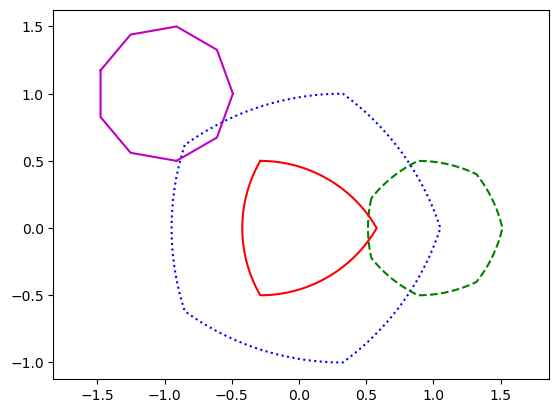

In [30]:
sides=relo.regular_polygon_Relo(5,[0,0],2,50)    # all positional args
plt.plot(sides[:,0],sides[:,1],'b:')   
sides1=relo.regular_polygon_Relo(N=100,center=[1,0],n=7,r=1)  # all key args
plt.plot(sides1[:,0],sides1[:,1],'g--')
sides2=relo.regular_polygon_Relo(9,[-1,1],N=2)  # positional and key args
plt.plot(sides2[:,0],sides2[:,1],'m')
sides3=relo.regular_polygon_Relo()    # all standard args
plt.plot(sides3[:,0],sides3[:,1],'r-')   
plt.axis('equal')